In [119]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
#import dataset
delay=pd.read_csv('new.csv')
delay.head()

,Flight_Date,Airline_Name,Origin_City,Destination_City,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Cancelled_Flag,Cancellation_Code,Diverted_Flag,Scheduled_Elapsed_Time_Minutes,Actual_Elapsed_Time_Minutes,Carrier_Delay_HH_MM,Weather_Delay_HH_MM,NAS_Delay_HH_MM,Security_Delay_HH_MM,Late_Aircraft_Delay_HH_MM
0,2019-12-03,JetBlue Airways,"Fort Lauderdale, FL","Boston, MA",06:10,06:03,-7.0,09:14,10:18,64.0,Not Cancelled,Not Cancelled,Not Diverted,184.0,255.0,26:04,04:44,01:04,01:38,03:37
1,2019-01-26,American Airlines Inc.,"Las Vegas, NV","Miami, FL",12:38,12:32,-6.0,20:20,20:15,-5.0,Not Cancelled,Not Cancelled,Not Diverted,282.0,283.0,30:38,14:28,02:50,04:39,08:23
2,2023-08-25,Alaska Airlines Inc.,"Seattle, WA","Pittsburgh, PA",09:35,09:27,-8.0,17:14,16:51,-23.0,Not Cancelled,Not Cancelled,Not Diverted,279.0,264.0,08:27,16:37,03:22,04:52,01:49
3,2021-10-24,Endeavor Air Inc.,"New York, NY","Richmond, VA",12:43,12:33,-10.0,14:10,13:51,-19.0,Not Cancelled,Not Cancelled,Not Diverted,87.0,78.0,44:52,04:48,04:39,02:49,10:38
4,2023-02-14,Alaska Airlines Inc.,"Los Angeles, CA","Seattle, WA",10:50,12:31,101.0,13:48,16:08,140.0,Not Cancelled,Not Cancelled,Not Diverted,178.0,217.0,28:40,21:38,00:39,04:13,01:41


# Exploratory Data Analysis(EDA)

In [121]:
delay.shape

(50000, 20)

In [122]:
delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Flight_Date                     50000 non-null  object 
 1   Airline_Name                    50000 non-null  object 
 2   Origin_City                     50000 non-null  object 
 3   Destination_City                50000 non-null  object 
 4   Scheduled_Departure_Time        50000 non-null  object 
 5   Actual_Departure_Time           50000 non-null  object 
 6   Departure_Delay_Minutes         50000 non-null  float64
 7   Scheduled_Arrival_Time          50000 non-null  object 
 8   Actual_Arrival_Time             50000 non-null  object 
 9   Arrival_Delay_Minutes           50000 non-null  float64
 10  Cancelled_Flag                  50000 non-null  object 
 11  Cancellation_Code               50000 non-null  object 
 12  Diverted_Flag                   

In [123]:
delay['Flight_Date'].sort_values(ascending=True)

16767    2019-01-01
34549    2019-01-01
47435    2019-01-01
34183    2019-01-01
13627    2019-01-01
            ...    
31418    2023-08-31
40177    2023-08-31
39364    2023-08-31
25536    2023-08-31
25807    2023-08-31
Name: Flight_Date, Length: 50000, dtype: object

In [124]:
delay.describe()

,Departure_Delay_Minutes,Arrival_Delay_Minutes,Scheduled_Elapsed_Time_Minutes,Actual_Elapsed_Time_Minutes
count,50000.000000,50000.000000,50000.000000,50000.00000
mean,9.986680,4.088500,141.790500,135.60202
std,50.681468,52.382558,71.208865,70.33093
min,-56.000000,-75.000000,22.000000,17.00000
25%,-5.000000,-15.000000,90.000000,85.00000
50%,-2.000000,-7.000000,125.000000,120.00000
75%,6.000000,6.000000,172.000000,165.00000
max,2966.000000,2934.000000,675.000000,663.00000


In [125]:
#standardizing column names
delay.columns=delay.columns.str.lower()

In [126]:
#canceled or diverted flights don't have an arrival time, so we can't model them as delayed or on time so they all filtered out here
delay=delay[(delay['cancelled_flag']=='Not Cancelled')&(delay['diverted_flag']=='Not Diverted')]

In [127]:
#label the target variable. If arrival delay is more than 15 minutes, label as 1 (delayed), else 0 (on time)
delay["delayed"] = (delay["arrival_delay_minutes"] > 15).astype(int)
delay["delayed"].value_counts(normalize=True)

delayed
0    0.820644
1    0.179356
Name: proportion, dtype: float64

In [128]:
delay.dtypes

flight_date                        object
airline_name                       object
origin_city                        object
destination_city                   object
scheduled_departure_time           object
actual_departure_time              object
departure_delay_minutes           float64
scheduled_arrival_time             object
actual_arrival_time                object
arrival_delay_minutes             float64
cancelled_flag                     object
cancellation_code                  object
diverted_flag                      object
scheduled_elapsed_time_minutes    float64
actual_elapsed_time_minutes       float64
carrier_delay_hh_mm                object
weather_delay_hh_mm                object
nas_delay_hh_mm                    object
security_delay_hh_mm               object
late_aircraft_delay_hh_mm          object
delayed                             int64
dtype: object

In [129]:
#convert data columns to datetime format
delay['flight_date']=pd.to_datetime(delay['flight_date'])
delay['scheduled_departure_time']=pd.to_datetime(delay['scheduled_departure_time'])
delay['actual_departure_time']=pd.to_datetime(delay['actual_departure_time'])
delay['scheduled_arrival_time']=pd.to_datetime(delay['scheduled_arrival_time'])
delay['actual_arrival_time']=pd.to_datetime(delay['actual_arrival_time'])


C:\Users\hp\AppData\Local\Temp\ipykernel_18892\3905958042.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  delay['scheduled_departure_time']=pd.to_datetime(delay['scheduled_departure_time'])
C:\Users\hp\AppData\Local\Temp\ipykernel_18892\3905958042.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  delay['actual_departure_time']=pd.to_datetime(delay['actual_departure_time'])
C:\Users\hp\AppData\Local\Temp\ipykernel_18892\3905958042.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  delay['scheduled_arrival_time']=pd.to_datetime(delay['scheduled_arrival_time'])
C:\Users

In [130]:
#extract date features from flight_date column
delay['year']=delay['flight_date'].dt.year
delay['month']=delay['flight_date'].dt.month
delay['day']=delay['flight_date'].dt.day
delay['day_of_week']=delay['flight_date'].dt.dayofweek
delay['is_weekend']=delay['day_of_week'].isin([5,6])

In [131]:
#extract hour from scheduled_departure_time column, since late departures tend to be delayed
delay['dep_hour']=delay['scheduled_departure_time'].dt.hour

In [132]:
#create a new feature 'route' by combining origin_city and destination_city
delay['route']=delay['origin_city'] + '->' + delay['destination_city']

In [133]:
delay['route'].head()

0    Fort Lauderdale, FL->Boston, MA
1           Las Vegas, NV->Miami, FL
2        Seattle, WA->Pittsburgh, PA
3         New York, NY->Richmond, VA
4       Los Angeles, CA->Seattle, WA
Name: route, dtype: object

delayed
On-time    0.821
Delayed    0.179
Name: proportion, dtype: float64


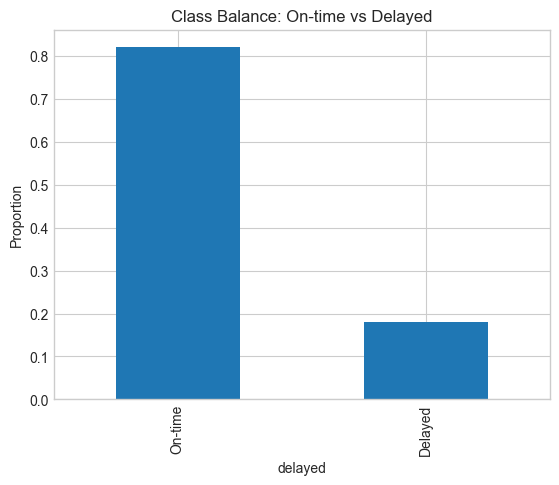

In [134]:
#1) Class balance between on-time and delayed flights

#calculate class balance by normalizing value counts of the 'delayed' column
balance = delay["delayed"].value_counts(normalize=True).rename({0:"On-time",1:"Delayed"})
print(balance.round(3))

#plot class balance
balance.plot(kind="bar")
plt.title("Class Balance: On-time vs Delayed")
plt.ylabel("Proportion")
plt.show()



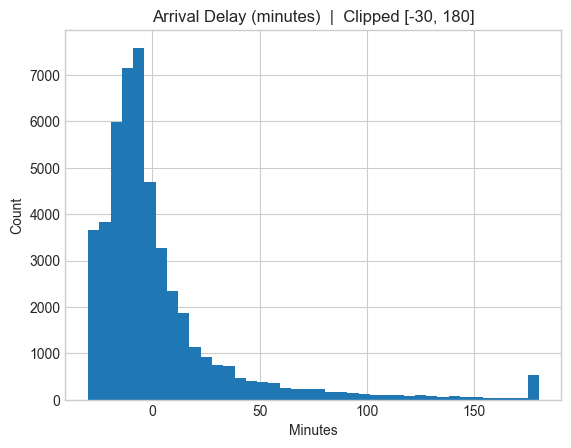

In [135]:
#2) Arrival delay in minutes distribution 

# to avoid long tails, clip delays below -30 and above 180 minutes
clip = delay["arrival_delay_minutes"].clip(lower=-30, upper=180)
clip.hist(bins=40)

#plot it
plt.title("Arrival Delay (minutes)  |  Clipped [-30, 180]")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.show()

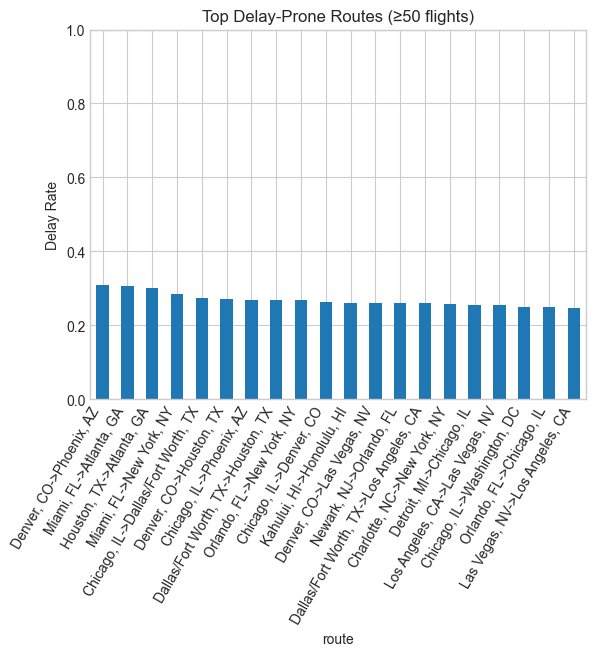

In [136]:
#3) routes with consistently high delay rates.
#to keep it realistic only routes with >= 50 flights are kept to avoid tiny-sample noise

#count how many flights per route
route_counts = delay["route"].value_counts()

#keep only routes that have 50 or more flights
big_routes = route_counts[route_counts >= 50].index

#calculate delay rate per route for big routes
route_rates = (
    delay[delay["route"].isin(big_routes)]
    .groupby("route")["delayed"].mean()
    .sort_values(ascending=False)
)

#plot the top 20 delay-prone routes
route_rates.head(20).plot(kind="bar")
plt.title("Top Delay-Prone Routes (≥50 flights)")
plt.ylabel("Delay Rate")
plt.xticks(rotation=60, ha="right")
plt.ylim(0, 1)
plt.show()


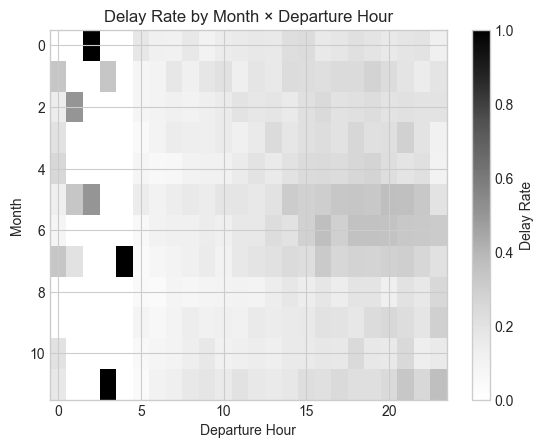

In [137]:
#4) hot zones (e.g., summer evenings).
pivot = delay.pivot_table(index="month", columns="dep_hour", values="delayed", aggfunc="mean")
plt.imshow(pivot, aspect="auto")
plt.title("Delay Rate by Month × Departure Hour")
plt.xlabel("Departure Hour")
plt.ylabel("Month")
plt.colorbar(label="Delay Rate")
plt.show()

Interpretation: Early-morning departures (00:00–04:00) consistently show the highest delay rates across several months, likely due to overnight operations and limited recovery time from previous-day delays. Summer months (June–August) also display elevated delay levels across more hours, reflecting peak travel congestion. Evening flights show moderate increases as delays accumulate throughout the day. Overall, the matrix indicates that delays are not evenly distributed but are concentrated in specific seasonal and hourly windows, which can guide scheduling and operational planning.

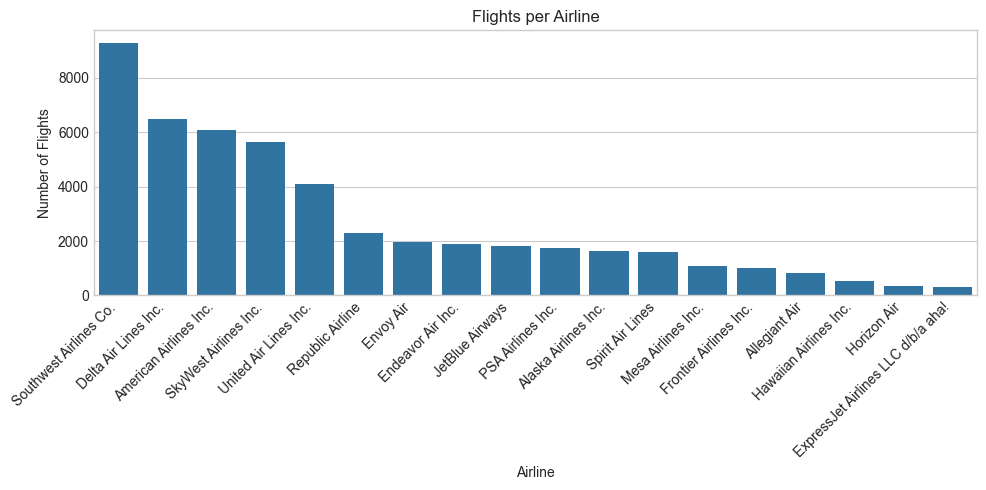

In [138]:
#5)Number of flights per airline
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(data=delay, x="airline_name", order=delay["airline_name"].value_counts().index)
plt.title("Flights per Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_18892\1560692630.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha="right")


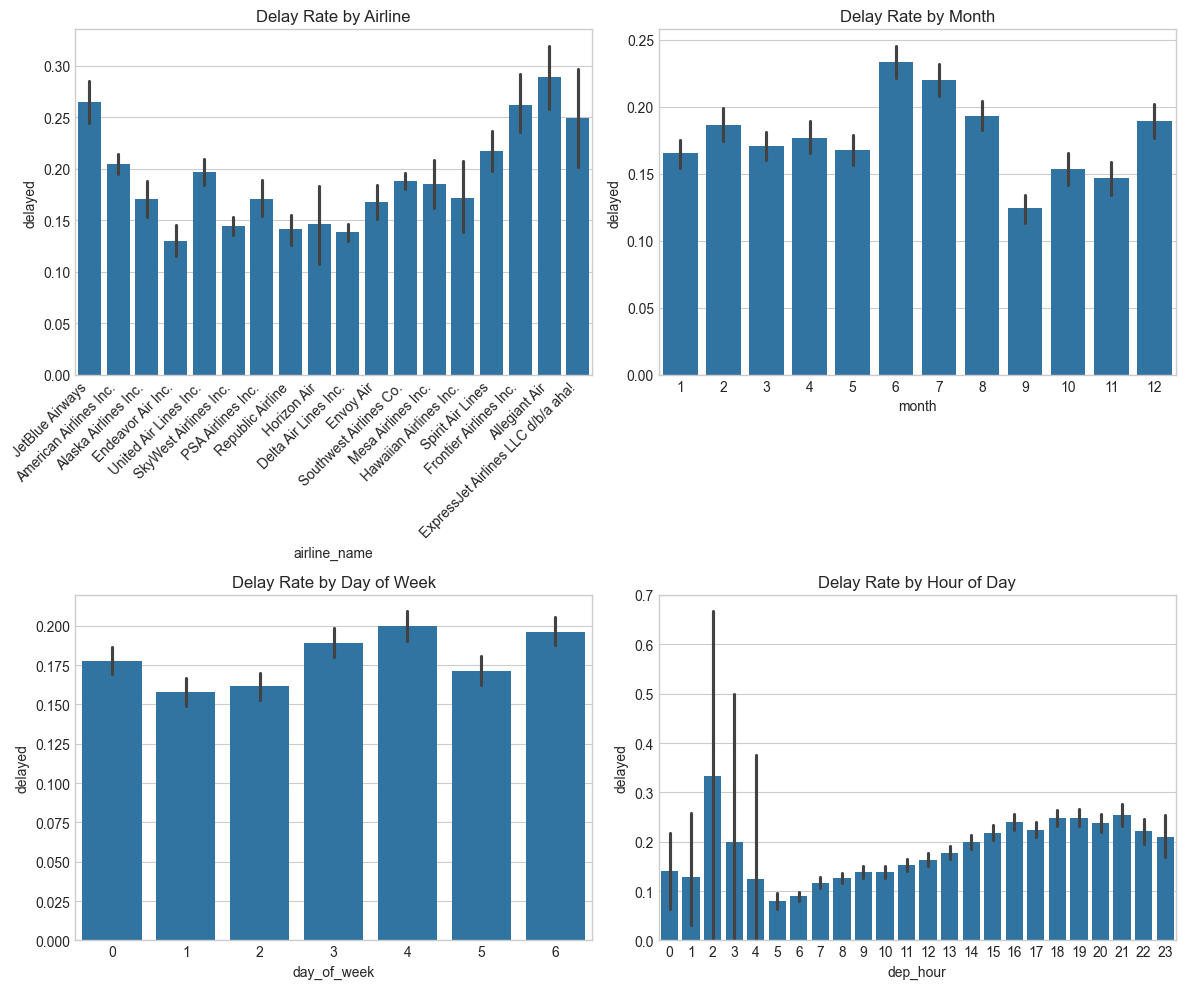

In [139]:
#6) Delays by airline, month, day_of_week, hour
#we do this to see winter/summer peaks, day_of_week peaks, late-evening spikes
fig, axes = plt.subplots(2, 2, figsize=(12,10))

# Delay Rate by Airline
sns.barplot(ax=axes[0,0], data=delay, x="airline_name", y="delayed")
axes[0,0].set_title("Delay Rate by Airline")
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha="right")

# Delay Rate by Month
sns.barplot(ax=axes[0,1], data=delay, x="month", y="delayed")
axes[0,1].set_title("Delay Rate by Month")

# Delay Rate by Day of Week
sns.barplot(ax=axes[1,0], data=delay, x="day_of_week", y="delayed")
axes[1,0].set_title("Delay Rate by Day of Week")

# Delay Rate by Hour
sns.barplot(ax=axes[1,1], data=delay, x="dep_hour", y="delayed")
axes[1,1].set_title("Delay Rate by Hour of Day")

plt.tight_layout()
plt.show()


Interpretation:
Some airlines show consistently higher delay rates, suggesting differences in fleet management, staffing, or scheduling efficiency.
Seasonality is also clear: delays peak in the summer months (especially June–August), when travel volume is highest and weather disruptions are more common. 
Day-of-week patterns show slightly higher delays on mid-week and weekend days, due to fluctuating demand.
The departure hour—early-morning flights (00:00–04:00) experience the highest delay rates, probably due to overnight operational constraints, while delay rates climb again later in the evening.

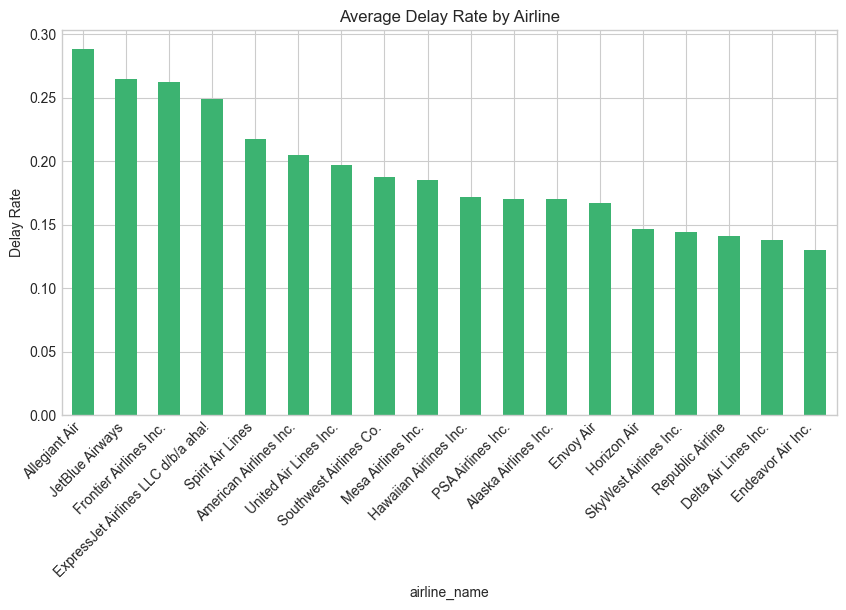

In [140]:
#7) Delay rate per airline or route

#calculate the mean delay rate per airline
delay_rate_airline = delay.groupby("airline_name")["delayed"].mean().sort_values(ascending=False)

#plot the delay rates per airline
delay_rate_airline.plot(kind="bar", figsize=(10,5), color="mediumseagreen")
plt.title("Average Delay Rate by Airline")
plt.ylabel("Delay Rate")
plt.xticks(rotation=45, ha="right")
plt.show()


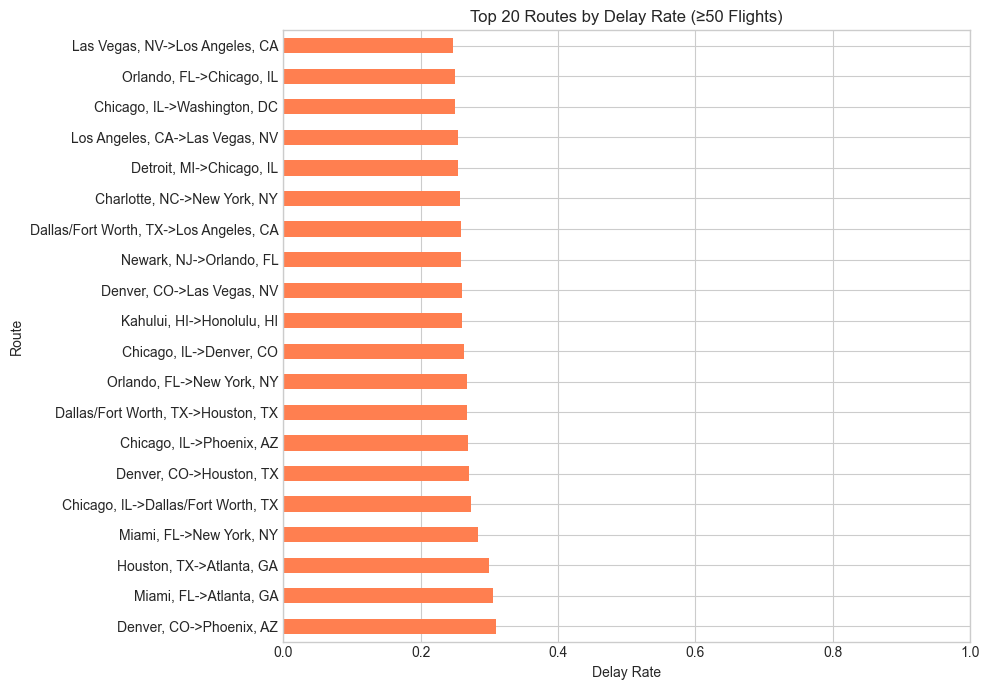

In [141]:
#8) Routes that have the most delays

#  Count how many flights per route
route_counts = delay["route"].value_counts()

# Keep only routes that have 50 or more flights
big_routes = route_counts[route_counts >= 50].index

# Compute average delay rate for these frequent routes
route_rates = (
    delay[delay["route"].isin(big_routes)]
    .groupby("route")["delayed"]
    .mean()
    .sort_values(ascending=False)
)

# Plot top 20 delay-prone routes (only where n ≥ 50)
plt.figure(figsize=(10,7))
route_rates.head(20).plot(kind="barh", color="coral")
plt.title("Top 20 Routes by Delay Rate (≥50 Flights)")
plt.xlabel("Delay Rate")
plt.ylabel("Route")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [142]:
# To see the correlation between different delay causes, we first need to convert the HH:MM format to total minutes.

# Function to convert HH:MM string to minutes
def hhmm_to_minutes(x):
    if isinstance(x, str):
        try:
            h, m = x.split(":")
            return int(h) * 60 + int(m)
        except:
            return 0
    return 0

# Apply conversion to all delay cause columns
delay["carrier_delay_min"] = delay["carrier_delay_hh_mm"].apply(hhmm_to_minutes)
delay["weather_delay_min"] = delay["weather_delay_hh_mm"].apply(hhmm_to_minutes)
delay["nas_delay_min"] = delay["nas_delay_hh_mm"].apply(hhmm_to_minutes)
delay["security_delay_min"] = delay["security_delay_hh_mm"].apply(hhmm_to_minutes)
delay["late_aircraft_delay_min"] = delay["late_aircraft_delay_hh_mm"].apply(hhmm_to_minutes)


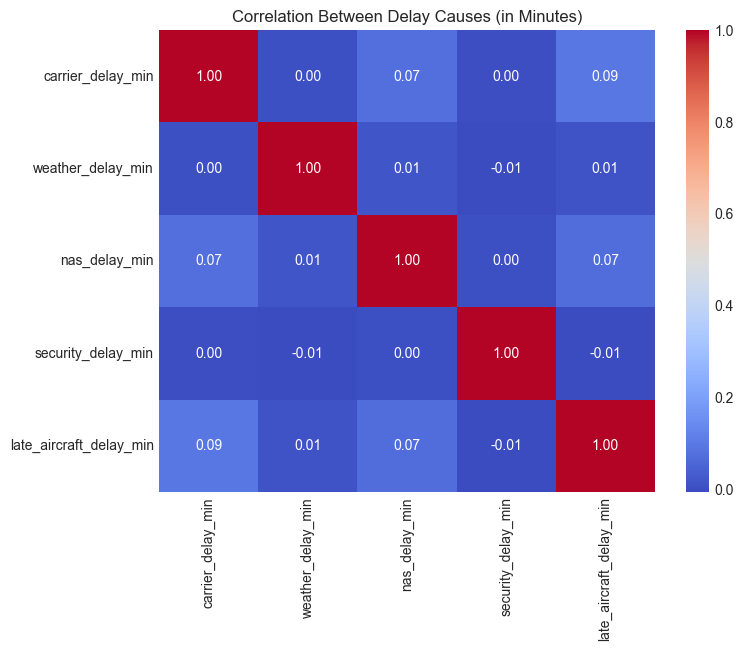

In [143]:
# 9) Correlation Between Delay Causes
delay_causes = delay[
    ["carrier_delay_min", "weather_delay_min", "nas_delay_min",
     "security_delay_min", "late_aircraft_delay_min"]
]

# Compute correlation matrix
corr = delay_causes.corr()

# Plot as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Delay Causes (in Minutes)")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_18892\401815969.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cause_df, x="Delay Cause", y="Total Minutes", palette="Oranges_r")


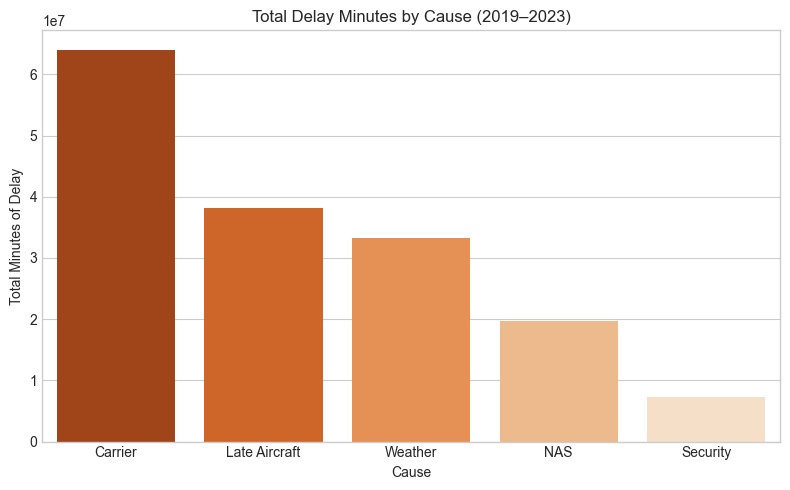

In [144]:
#10) which delay cause contributes the most to total delay minutes?

# Sum total minutes for each delay cause
cause_totals = {
    "Carrier": delay["carrier_delay_min"].sum(),
    "Weather": delay["weather_delay_min"].sum(),
    "NAS": delay["nas_delay_min"].sum(),
    "Security": delay["security_delay_min"].sum(),
    "Late Aircraft": delay["late_aircraft_delay_min"].sum()
}

# Convert to DataFrame for plotting
cause_df = pd.DataFrame(list(cause_totals.items()), columns=["Delay Cause", "Total Minutes"])
cause_df = cause_df.sort_values("Total Minutes", ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=cause_df, x="Delay Cause", y="Total Minutes", palette="Oranges_r")
plt.title("Total Delay Minutes by Cause (2019–2023)")
plt.ylabel("Total Minutes of Delay")
plt.xlabel("Cause")
plt.tight_layout()
plt.show()

# Feature Engineering

In [145]:
delay.dtypes

flight_date                       datetime64[ns]
airline_name                              object
origin_city                               object
destination_city                          object
scheduled_departure_time          datetime64[ns]
actual_departure_time             datetime64[ns]
departure_delay_minutes                  float64
scheduled_arrival_time            datetime64[ns]
actual_arrival_time               datetime64[ns]
arrival_delay_minutes                    float64
cancelled_flag                            object
cancellation_code                         object
diverted_flag                             object
scheduled_elapsed_time_minutes           float64
actual_elapsed_time_minutes              float64
carrier_delay_hh_mm                       object
weather_delay_hh_mm                       object
nas_delay_hh_mm                           object
security_delay_hh_mm                      object
late_aircraft_delay_hh_mm                 object
delayed             

In [146]:
# Feature Engineering: Past Delay Rates

#1) Airline × Month (past only within same month) 
# so that past data only is used, we sort by airline, month, and flight_date(data leakage prevention)
delay = delay.sort_values(["airline_name", "month", "flight_date"])
g = delay.groupby(["airline_name", "month"])["delayed"]

past_sum  = g.cumsum() - delay["delayed"]          # exclude current row
past_cnt  = g.cumcount()                           # number of past rows
# Airline × Month (past only within same month) 
delay["airline_month_delay_rate"] = (past_sum / past_cnt).replace([np.inf, -np.inf], np.nan)

#2) Route × Month (past only within same month)
#so that past data only is used, we sort by route, month, and flight_date(data leakage prevention)
delay = delay.sort_values(["route", "month", "flight_date"])
g2 = delay.groupby(["route", "month"])["delayed"]

past_sum2 = g2.cumsum() - delay["delayed"] #exclude current row
past_cnt2 = g2.cumcount()                  #number of past rows
# Route × Month (past only within same month)
delay["route_month_delay_rate"] = (past_sum2 / past_cnt2).replace([np.inf, -np.inf], np.nan)


In [ ]:
import holidays

#3) Day-of-week delay rate (system-wide)
delay["dow_delay_rate"] = (
    delay.groupby("day_of_week")["delayed"].transform("mean")
)

#4) Airport congestion proxies
delay["origin_daily_departures"] = (
    delay.groupby(["flight_date", "origin_city"])["flight_date"].transform("count")
)
delay["dest_daily_arrivals"] = (
    delay.groupby(["flight_date", "destination_city"])["flight_date"].transform("count")
)

#5) Peak season indicator
delay["is_peak_season"] = delay["month"].isin([1,2, 6, 7, 8, 12]).astype(int)

#6) U.S. holiday indicator
us_holidays = holidays.US()
delay["is_holiday"] = delay["flight_date"].isin(us_holidays).astype(int)


#check the new features
print("New features added:", [
    "airline_month_delay_rate", "route_month_delay_rate", "dow_delay_rate",
    "origin_daily_departures", "dest_daily_arrivals",
    "is_peak_season", "is_holiday"
])
print(delay[[
    "airline_month_delay_rate", "route_month_delay_rate",
    "origin_daily_departures", "dest_daily_arrivals", "is_peak_season", "is_holiday"
]].head())


New features added: ['airline_month_delay_rate', 'route_month_delay_rate', 'dow_delay_rate', 'origin_daily_departures', 'dest_daily_arrivals', 'is_peak_season', 'is_holiday']
       airline_month_delay_rate  route_month_delay_rate  \
2248                   0.122222                     NaN   
2708                   0.110000                     NaN   
22113                  0.150000                     NaN   
18541                  0.266667                     NaN   
7461                   0.228571                     0.0   

       origin_daily_departures  dest_daily_arrivals  is_peak_season  \
2248                         1                    1               0   
2708                         1                    1               1   
22113                        1                    2               0   
18541                        1                    2               1   
7461                         1                    3               1   

       is_holiday  
2248            0  
270

# Preprocessing

In [148]:
#cyclical Encoding of Time Features
#We do this to capture the cyclical nature of time-based features like hour of day, day of week, and month.

# Hour of day
delay["dep_hour_sin"] = np.sin(2*np.pi*delay["dep_hour"]/24)
delay["dep_hour_cos"] = np.cos(2*np.pi*delay["dep_hour"]/24)

# Day of week 
delay["day_of_week_sin"] = np.sin(2*np.pi*delay["day_of_week"]/7)
delay["day_of_week_cos"] = np.cos(2*np.pi*delay["day_of_week"]/7)

# Month( make it 0..11 by subtracting 1)
delay["month0"] = delay["month"] - 1
delay["month_sin"] = np.sin(2*np.pi*delay["month0"]/12)
delay["month_cos"] = np.cos(2*np.pi*delay["month0"]/12)

# drop originals since we won’t use them directly
delay = delay.drop(columns=["dep_hour","day_of_week","month","month0"])


In [149]:
delay.columns

Index(['flight_date', 'airline_name', 'origin_city', 'destination_city',
       'scheduled_departure_time', 'actual_departure_time',
       'departure_delay_minutes', 'scheduled_arrival_time',
       'actual_arrival_time', 'arrival_delay_minutes', 'cancelled_flag',
       'cancellation_code', 'diverted_flag', 'scheduled_elapsed_time_minutes',
       'actual_elapsed_time_minutes', 'carrier_delay_hh_mm',
       'weather_delay_hh_mm', 'nas_delay_hh_mm', 'security_delay_hh_mm',
       'late_aircraft_delay_hh_mm', 'delayed', 'year', 'day', 'is_weekend',
       'route', 'carrier_delay_min', 'weather_delay_min', 'nas_delay_min',
       'security_delay_min', 'late_aircraft_delay_min',
       'airline_month_delay_rate', 'route_month_delay_rate', 'dow_delay_rate',
       'origin_daily_departures', 'dest_daily_arrivals', 'is_peak_season',
       'is_holiday', 'dep_hour_sin', 'dep_hour_cos', 'day_of_week_sin',
       'day_of_week_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [150]:
delay.isna().mean()

flight_date                       0.000000
airline_name                      0.000000
origin_city                       0.000000
destination_city                  0.000000
scheduled_departure_time          0.000000
actual_departure_time             0.000000
departure_delay_minutes           0.000000
scheduled_arrival_time            0.000000
actual_arrival_time               0.000000
arrival_delay_minutes             0.000000
cancelled_flag                    0.000000
cancellation_code                 0.000000
diverted_flag                     0.000000
scheduled_elapsed_time_minutes    0.000000
actual_elapsed_time_minutes       0.000000
carrier_delay_hh_mm               0.000000
weather_delay_hh_mm               0.000000
nas_delay_hh_mm                   0.000000
security_delay_hh_mm              0.000000
late_aircraft_delay_hh_mm         0.000000
delayed                           0.000000
year                              0.000000
day                               0.000000
is_weekend 

In [151]:
# Sort the full DataFrame by flight_date
delay = delay.sort_values("flight_date").reset_index(drop=True)

#preditors used for modeling
x=delay[["airline_name",
    "origin_city",
    "destination_city",
    "scheduled_elapsed_time_minutes",
    "is_weekend",
    "route",
    "dep_hour_sin",
    'dep_hour_cos', 
    'day_of_week_sin', 
    'day_of_week_cos', 
    'month_sin',
    'month_cos',
    "airline_month_delay_rate",
    "route_month_delay_rate",
    "dow_delay_rate",
    "origin_daily_departures",
    "dest_daily_arrivals",
    "is_peak_season",
    "is_holiday"]]

#target variable
y=delay[['delayed']]

Certain columns, such as actual_elapsed_time_minutes, carrier_delay_hh_mm, weather_delay_hh_mm, nas_delay_hh_mm, and security_delay_hh_mm—were excluded because they represent information that becomes available only after a flight has already taken place. Using these values would cause data leakage, that means the model would rely on outcomes or post-departure conditions that cannot be known when making predictions.

In [152]:
y.value_counts()

delayed
0          39839
1           8707
Name: count, dtype: int64

In [153]:
x.dtypes

airline_name                       object
origin_city                        object
destination_city                   object
scheduled_elapsed_time_minutes    float64
is_weekend                           bool
route                              object
dep_hour_sin                      float64
dep_hour_cos                      float64
day_of_week_sin                   float64
day_of_week_cos                   float64
month_sin                         float64
month_cos                         float64
airline_month_delay_rate          float64
route_month_delay_rate            float64
dow_delay_rate                    float64
origin_daily_departures             int64
dest_daily_arrivals                 int64
is_peak_season                      int64
is_holiday                          int64
dtype: object

In [154]:
#get categorical and numerical columns
categorical=list(x.select_dtypes(['object']).columns)
numerical=list(x.select_dtypes(['int64', 'float64','bool']).columns)

print(numerical)
print(categorical)

['scheduled_elapsed_time_minutes', 'is_weekend', 'dep_hour_sin', 'dep_hour_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'airline_month_delay_rate', 'route_month_delay_rate', 'dow_delay_rate', 'origin_daily_departures', 'dest_daily_arrivals', 'is_peak_season', 'is_holiday']
['airline_name', 'origin_city', 'destination_city', 'route']


# Build pipeline

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#define preprocessing pipelines for numerical and categorical features

#standard scaling for numerical features with mean imputation for missing values
numerical_pipeline=Pipeline(
    [
    ('numerical_scaler', StandardScaler()),
    ("imputer", SimpleImputer(strategy="mean"))
    ]
)

#one-hot encoding for categorical features
categorical_pipeline=Pipeline(
    [
        ('categorical_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]
)

In [156]:
#combine both pipelines into a ColumnTransformer 
preprocessor = ColumnTransformer(
    [
        ("numerical_variables", numerical_pipeline, numerical),
        ( "categorical_variables", categorical_pipeline, categorical),
    ]
)

# split the data

In [158]:
#we are going to do a time-based split instead of random split to prevent data leakage

# Find the index cutoff for 80% train, 20% test
cutoff = int(len(delay) * 0.80)

# Split based on order (NOT random)
x_train, x_test = x.iloc[:cutoff], x.iloc[cutoff:]
y_train, y_test = y.iloc[:cutoff], y.iloc[cutoff:]

#check
print("Train period:", delay["flight_date"].iloc[0], "→", delay["flight_date"].iloc[cutoff-1])
print("Test period:", delay["flight_date"].iloc[cutoff], "→", delay["flight_date"].iloc[-1])

Train period: 2019-01-01 00:00:00 → 2022-10-19 00:00:00
Test period: 2022-10-19 00:00:00 → 2023-08-31 00:00:00


In [159]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(38836, 19)
(9710, 19)
(38836, 1)
(9710, 1)


In [160]:
print(y_train.value_counts(normalize=True).mean())
print(y_test.value_counts(normalize=True).mean())

0.5
0.5


In [161]:
preprocessor

,transformers,"[('numerical_variables', ...), ('categorical_variables', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [162]:
preprocessor.set_output(transform="pandas")

# Fit/transform
x_train_pp = preprocessor.fit_transform(x_train)
x_test_pp  = preprocessor.transform(x_test)

x_train_pp.head()



,numerical_variables__scheduled_elapsed_time_minutes,numerical_variables__is_weekend,numerical_variables__dep_hour_sin,numerical_variables__dep_hour_cos,numerical_variables__day_of_week_sin,numerical_variables__day_of_week_cos,numerical_variables__month_sin,numerical_variables__month_cos,numerical_variables__airline_month_delay_rate,numerical_variables__route_month_delay_rate,...,"categorical_variables__route_Worcester, MA->Detroit, MI","categorical_variables__route_Worcester, MA->Fort Lauderdale, FL","categorical_variables__route_Worcester, MA->New York, NY","categorical_variables__route_Worcester, MA->Orlando, FL","categorical_variables__route_Wrangell, AK->Petersburg, AK","categorical_variables__route_Yakima, WA->Seattle, WA","categorical_variables__route_Yakutat, AK->Cordova, AK","categorical_variables__route_Yakutat, AK->Juneau, AK","categorical_variables__route_Yuma, AZ->Dallas/Fort Worth, TX","categorical_variables__route_Yuma, AZ->Phoenix, AZ"
0,-0.851358,-0.614653,1.441824,0.729503,1.113849,0.869605,-0.020898,1.450964,7.064951e-17,7.160925e-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.710093,-0.614653,-0.558647,2.362001,1.113849,0.869605,-0.020898,1.450964,9.769980e+00,7.160925e-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.041594,-0.614653,0.453350,-1.091312,1.113849,0.869605,-0.020898,1.450964,9.769980e+00,7.160925e-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.547166,-0.614653,1.051208,-0.603426,1.113849,0.869605,-0.020898,1.450964,-2.047289e+00,7.160925e-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.006750,-0.614653,-0.558647,-0.902995,1.113849,0.869605,-0.020898,1.450964,-2.047289e+00,7.160925e-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling

# Logistic Regression(unweighted)

In [1]:
#unweighted logistic regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [164]:
#fit the model on the preprocessed training data
clf.fit(x_train_pp, y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [165]:
#predictions on the test set
y_pred=clf.predict(x_test_pp)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(9710,))

In [166]:
from sklearn.metrics import classification_report
#evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      7555
           1       0.35      0.01      0.02      2155

    accuracy                           0.78      9710
   macro avg       0.57      0.50      0.45      9710
weighted avg       0.68      0.78      0.68      9710



# Logistic Regression(Weighted)

In [167]:
#wighted logistic regression to handle class imbalance
clf2 = LogisticRegression(class_weight='balanced')
clf2.fit(x_train_pp, y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [168]:
y_pred=clf2.predict(x_test_pp)
y_pred

array([0, 1, 0, ..., 0, 1, 1], shape=(9710,))

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.63      0.71      7555
           1       0.28      0.51      0.36      2155

    accuracy                           0.60      9710
   macro avg       0.55      0.57      0.54      9710
weighted avg       0.70      0.60      0.63      9710



# Random Forest

In [170]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

#Hyperparameter tuning for Random Forest Classifier
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [8, 10, 12, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Set up RandomizedSearchCV to find the best hyperparameters
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

#fit the randomized search on the training data
rf_random.fit(x_train_pp, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best F1 Score:", rf_random.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced_subsample'}
Best F1 Score: 0.3054419988367753


In [186]:
#evaluate the best model from randomized search
best_rf = rf_random.best_estimator_

#predictions on the test set
y_pred1 = best_rf.predict(x_test_pp)

#evaluate model performance
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.58      0.69      7555
           1       0.29      0.59      0.39      2155

    accuracy                           0.58      9710
   macro avg       0.56      0.58      0.54      9710
weighted avg       0.71      0.58      0.62      9710



# Random Forest with SMOTE

In [172]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

#try smote(resampling technique) to see if it improves performance
smote = SMOTE(random_state=42)

rf = RandomForestClassifier(
    **rf_random.best_params_,  # choose the best hyperparameters from randomized search
    random_state=42,
    n_jobs=-1
)

#create an imbalanced-learn pipeline with SMOTE and Random Forest
model = ImbPipeline([
    ('smote', smote),
    ('rf', rf)
])

model.fit(x_train_pp, y_train)
y_pred = model.predict(x_test_pp)

#evaluate model with smote performance
print(classification_report(y_test, y_pred))

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.80      0.80      0.80      7555
           1       0.31      0.31      0.31      2155

    accuracy                           0.69      9710
   macro avg       0.55      0.55      0.55      9710
weighted avg       0.69      0.69      0.69      9710



SMOTE is used to see if it would improve the accuracy of RandomForest but it actually performed worse so we will continue with Random Forest without SMOTE

# Random Forest without SMOTE and maximized recall

Choose the best threshold to maximize recall for RandomForestClassifer

In [183]:

from sklearn.metrics import precision_recall_curve

#Get predicted probabilities for the positive class
y_proba = rf_random.predict_proba(x_test_pp)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

#choose the target recall
target_recall = 0.8

#Find the threshold that gives the closest recall to the target
idx = np.argmin(np.abs(recall - target_recall))
best_threshold = thresholds[idx]

print("Chosen threshold:", best_threshold)
print("Recall:", recall[idx])
print("Precision:", precision[idx])


Chosen threshold: 0.4854980564631313
Recall: 0.8
Precision: 0.24981886683089408


In [196]:
#Evaluate model performance with adjusted threshold
y_pred_adjusted = (y_proba >=best_threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.85      0.31      0.46      7555
           1       0.25      0.80      0.38      2155

    accuracy                           0.42      9710
   macro avg       0.55      0.56      0.42      9710
weighted avg       0.71      0.42      0.44      9710



# Balanced Random Forest

In [175]:
#Balanced Random Forest
from imblearn.ensemble import BalancedRandomForestClassifier

#train balanced random forest classifier with optimized hyperparameters
brf = BalancedRandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

#fit and predict
brf.fit(x_train_pp, y_train)
y_pred = brf.predict(x_test_pp)

print(classification_report(y_test, y_pred))


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.83      0.63      0.72      7555
           1       0.30      0.55      0.39      2155

    accuracy                           0.62      9710
   macro avg       0.57      0.59      0.55      9710
weighted avg       0.71      0.62      0.65      9710



# Balanced Random Forest with maximized recall

Choose the best threshold to maximize recall for Balanced Random Forest

In [208]:
#Get predicted probabilities for the positive class
y_proba = brf.predict_proba(x_test_pp)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

#choose the target recall
target_recall = 0.8

#Find the threshold that gives the closest recall to the target
idx = np.argmin(np.abs(recall - target_recall))
best_threshold = thresholds[idx]

print("Chosen threshold:", best_threshold)
print("Recall:", recall[idx])
print("Precision:", precision[idx])

Chosen threshold: 0.4523129371194011
Recall: 0.8
Precision: 0.2570065593321407


In [203]:
#Evaluate model performance with adjusted threshold
y_pred_adjusted = (y_proba >=best_threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.86      0.34      0.49      7555
           1       0.26      0.80      0.39      2155

    accuracy                           0.44      9710
   macro avg       0.56      0.57      0.44      9710
weighted avg       0.72      0.44      0.47      9710



# XGBoost

In [176]:
#XGBoost with scale_pos_weight
from xgboost import XGBClassifier

#calculate class imbalance ratio
ratio = (y_train == 0).sum() / (y_train == 1).sum()
print("Class imbalance ratio:", ratio)

#train XGBoost with different scale_pos_weight values
for w in [5, 7, 10, 12]:
    xgb=XGBClassifier(
        scale_pos_wieght=ratio,
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss'
        )

#hyperparameter tuning for XGBoost
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 10],
    'learning_rate': [0.01, 0.05, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

#randomized search for XGBoost
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,             # try 20 random combinations
    scoring='f1',          # focus on minority class performance
    cv=3,                  # 3-fold cross validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

#fit the model on the training set
random_search_xgb.fit(x_train_pp, y_train)

print("Best XGBoost Parameters:", random_search_xgb.best_params_)
print("Best F1 Score (CV):", random_search_xgb.best_score_)


Class imbalance ratio: delayed    4.92735
dtype: float64
Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:34:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_wieght" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1}
Best F1 Score (CV): 0.09842192413504201


In [181]:
#predictions on the test set
y_proba = random_search_xgb.predict_proba(x_test_pp)[:, 1]

#try different thresholds to improve recall
y_pred_thresh = (y_proba >= 0.1).astype(int)

print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.83      0.42      0.56      7555
           1       0.25      0.69      0.37      2155

    accuracy                           0.48      9710
   macro avg       0.54      0.56      0.47      9710
weighted avg       0.70      0.48      0.52      9710



# Conclusion


Across all models, precision for the delayed class consistently stayed between 0.20–0.30, which is expected given the imbalance of the dataset. Since our goal is to identify as many delayed flights as possible, we prioritized recall and tuned the classification threshold accordingly.

The Balanced Random Forest performed best, achieving:

Recall (delayed class): 0.80

Precision (delayed class): 0.26

This means the model correctly identifies most delayed flights, even though it produces more false alarms. This trade-off is acceptable because missing a real delay is more costly than predicting a delay that does not happen. For this reason, we selected the Balanced Random Forest as our final model.

# Confusion Matrix for the best model(Balanced Random Forest)

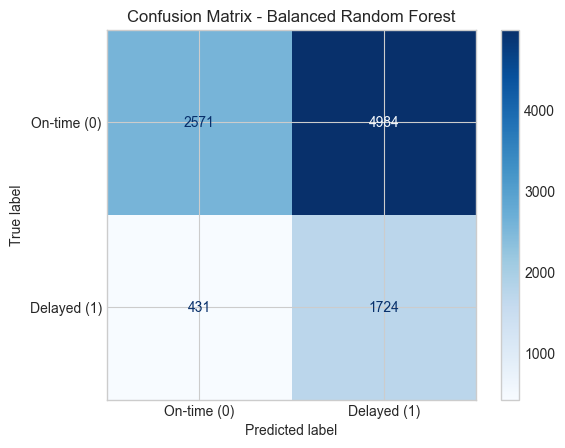

In [215]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix of Balanced Random Forest
cm = confusion_matrix(y_test, y_pred_adjusted)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["On-time (0)", "Delayed (1)"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Balanced Random Forest")
plt.show()